Data Science Dojo<br/>
Copyright(c) 2016-2020<br/>

---

**Objective:** Building a decision tree classification model to predict the species of Iris flowers<br/>


<b>Note</b>: The below packages are already installed on the learning portal to run this exercise.<br/>
If you would like to run this code on your local machine, please run the below install commands in your command line tool. <br/>
If you would like to run this code on your local Jupyter Notebook, you can also run the below install commands in a new cell of jupyter notebook instead of command line using this convention `!pip install package name`.<br/>

Please install pandas package: `pip install pandas`<br/>
Please install scikit-learn package: `pip install scikit-learn`<br/>
Please install numpy package: `pip install numpy`<br/>
Please install seaborn package: `pip install sns`<br/>
Please install matplotlib package: `pip install matplotlib`<br/>
Please install pydotplus package: `pip install pydotplus` *(Note: You might need to also install graphviz)*<br/>

### The Iris dataset
Before building a model for predicting the species of Iris flowers, we first need to read and explore the Iris dataset.

#### Dataset description
**Iris:** This iris data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are Iris setosa, versicolor, and virginica. __[Click here to read more](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/iris)__.

In [2]:
# Import the required package
from sklearn.datasets import load_iris
# Load the iris dataset into memory
iris = load_iris()

In [3]:
# Import the required package
import pandas as pd
# Create a dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [4]:
# View the dimension of the dataset   
iris_df.shape

(150, 5)

In [5]:
# View the first few rows of the dataset
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# View the structure/data types of the dataset   
iris_df.dtypes

sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
Species              category
dtype: object

In [7]:
# View the summary statistics of the dataset
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Building the model

Build and train a model to classify the different Iris species.

In [8]:
# Randomly select 70% of the data as training set
iris_df_train = iris_df.sample(frac=0.7, random_state=1)

In [9]:
# Use the remaining 30% as the testing set
iris_df_test = iris_df.loc[~iris_df.set_index(list(iris_df.columns)).index.isin(iris_df_train.set_index(list(iris_df_train.columns)).index)]

In [10]:
print('Training set',iris_df_train.shape)
print('Testing set',iris_df_test.shape)

Training set (105, 5)
Testing set (45, 5)


In [13]:
# Import the required packages
from sklearn.tree import DecisionTreeClassifier
import numpy as np
# Default decision tree model
# Builds a decision tree from the iris dataset to predict species given all other columns as predictors
np.random.seed(27)
iris_features = iris_df.columns[:4]
iris_dt_clf = DecisionTreeClassifier()
iris_dt_clf = iris_dt_clf.fit(iris_df_train[iris_features], iris_df_train['Species'])

### Visualizing the model

Let's look how the decision tree model looks visually for the Iris dataset.

In [15]:
# Import the required package
from sklearn import tree
# Visualize the model
# Plot the tree structure
dot_data = tree.export_graphviz(iris_dt_clf,
                                out_file=None,
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                rounded=True, 
                                filled=True)

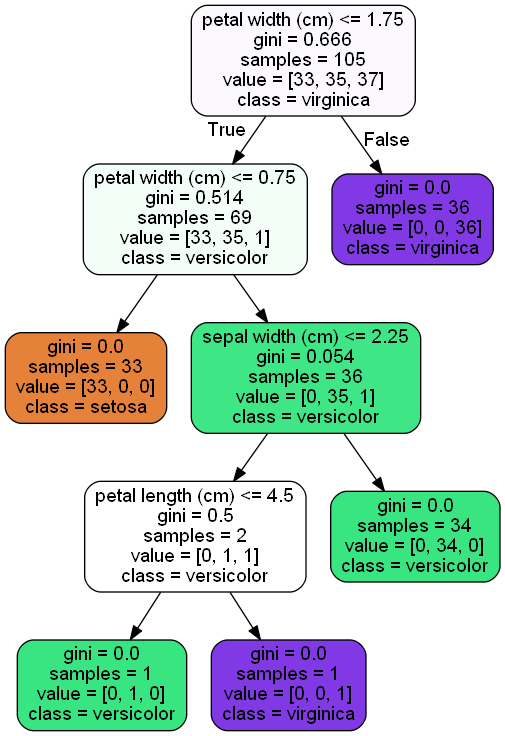

In [16]:
# Import the required packages
from IPython.display import Image
import pydotplus
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

Text(0, 0.5, 'Petal Length (cm)')

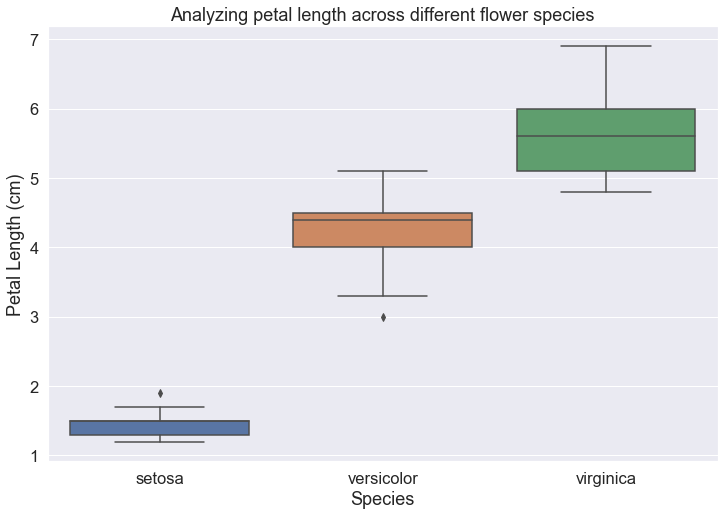

In [17]:
# Import the required packages
import seaborn as sns
import matplotlib.pyplot as plt
# Let's see how the Petal.Length looks across Species
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.5)
ax = sns.boxplot(data=iris_df_train, x="Species", y="petal length (cm)")
# Setting the category labels for x axis
ax.set_xticklabels(['setosa', 'versicolor', 'virginica'])
# Setting the title, x-label, y-label
plt.title("Analyzing petal length across different flower species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")

In [18]:
# Import the required package
from sklearn.externals.six import StringIO
# Print a string representation of the iris tree model
# If you have graphviz (www.graphviz.org) installed, you can write a pdf
# Visualization using graph.write_pdf(filename)
iris_dt_data = StringIO()
tree.export_graphviz(iris_dt_clf, out_file=iris_dt_data)
iris_dt_graph = pydotplus.parser.parse_dot_data(iris_dt_data.getvalue())
print(iris_dt_graph.to_string())

digraph Tree {
node [shape=box];
0 [label="X[3] <= 1.75\ngini = 0.666\nsamples = 105\nvalue = [33, 35, 37]"];
1 [label="X[3] <= 0.75\ngini = 0.514\nsamples = 69\nvalue = [33, 35, 1]"];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [label="gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]"];
1 -> 2;
3 [label="X[1] <= 2.25\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]"];
1 -> 3;
4 [label="X[2] <= 4.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]"];
3 -> 4;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]"];
4 -> 5;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"];
4 -> 6;
7 [label="gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]"];
3 -> 7;
8 [label="gini = 0.0\nsamples = 36\nvalue = [0, 0, 36]"];
0 -> 8  [headlabel="False", labelangle="-45", labeldistance="2.5"];
}



### Model predictions

We will use the test data to make predict the iris species using the model we built.

In [19]:
# Predict iris species given test data using the decision model
iris_dt_pred = iris_dt_clf.predict(iris_df_test[iris_features])
iris_dt_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [20]:
# Predicted values can also be probabilities, instead of class labels
iris_dt_pred_prob = iris_dt_clf.predict_proba(iris_df_test[iris_features])
iris_dt_pred_prob

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [21]:
# Comparison table of actual values and predicted values
iris_comparison = iris_df_test.copy()
iris_comparison['Predictions'] = iris_dt_pred
iris_comparison[['Species','Predictions']]

,Species,Predictions
0,setosa,setosa
1,setosa,setosa
3,setosa,setosa
7,setosa,setosa
8,setosa,setosa
13,setosa,setosa
20,setosa,setosa
21,setosa,setosa
22,setosa,setosa
24,setosa,setosa


In [22]:
# View misclassified rows
iris_comparison.loc[iris_comparison['Species'] != iris_comparison['Predictions']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Predictions
70,5.9,3.2,4.8,1.8,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,versicolor
129,7.2,3.0,5.8,1.6,virginica,versicolor
133,6.3,2.8,5.1,1.5,virginica,versicolor
134,6.1,2.6,5.6,1.4,virginica,versicolor


### Regression decision tree

Using decision tree, we can also build a regression model where the outcome is a predicted number instead of a predicted class.

In [24]:
# Import the required package
from sklearn import preprocessing
# Label encoding the categorial features
le = preprocessing.LabelEncoder()
le.fit(iris_df_train['Species'])
iris_df_train['Species'] = le.transform(iris_df_train['Species'])

In [25]:
# Import the required package
from sklearn.tree import DecisionTreeRegressor
# Use DecisionTreeRegressor() to build a regression decision tree model
features = ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)', 'Species']
iris_dt_clf = DecisionTreeRegressor()  
iris_dt_clf = iris_dt_clf.fit(iris_df_train[features], iris_df_train['petal length (cm)'])
iris_dt_clf

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

### Reproducible results with random_state

The sample() function used above, randomly selects rows from the dataset. So, the iris_df_train stores these rows. However, the rows stored in iris_df_train is not always fixed. If we run `iris_df_train = iris_df.sample(frac=0.7)` again, the rows in iris_df_train will be changed. As a result, the training data will be changed.  

+ Try running this code repeatedly and see how the output changes everytme.

  + `iris_df.sample(frac=0.7)`  

Often, we want our code to reproduce the exact same set of random numbers. We can use the `random_state` option to do this.  The `random_state` option takes an integer argument. Once the `random_state` has been used, the output of all the subsequent random operations, such as sample() get fixed, which ensures reproducability of the results.   

+ Try running iris_df.sample(frac=0.7) again but after setting the seed as 100  
    + `iris_df.sample(frac=0.7, random_state=100)` 
    
    
+ Now try running iris_df.sample(frac=0.7) again after changing the seed to 999 
    + `iris_df.sample(frac=0.7, random_state=999)`  
    
+ Change the seed back to 100 to see how you get the same results 
    + `iris_df.sample(frac=0.7, random_state=100)`  